In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = load_breast_cancer(as_frame=True)

In [4]:
dataFrame = data.frame

In [5]:
dataFrame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
print(dataFrame.iloc[0].values)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01 0.000e+00]


In [7]:
dataFrame.shape

(569, 31)

In [8]:
dataFrame.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [9]:
X = dataFrame.drop(['target'] , axis=1)
y = dataFrame['target']

In [10]:
scaler = StandardScaler()
standard_X = scaler.fit_transform(X)

In [11]:
X_train, X_test , y_train, y_test = train_test_split(standard_X , y , test_size= 0.2 , stratify=y)

### Building a Neural Network

In [12]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

Setting up the layers of Neural network

In [13]:
model = keras.Sequential([ 
                            keras.layers.Flatten(input_shape = (30,)) ,  #it converts into a single dimension array
                            keras.layers.Dense(20,activation='relu' ),  # 20 nuerons, 
                            # keras.layers.Dense(20, activation='sigmoid')  it means, it has 2 hidden layers
                            keras.layers.Dense(2, activation='sigmoid') # it should be 2, it means we have 2 classes.
]) 

Compile the Neural Network

In [14]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])


Training the Neural network

In [15]:
history = model.fit(X_train, y_train, validation_split=0.1 , epochs=20)

Epoch 1/20
13/13 [==============================] - 0s 11ms/step - loss: 0.5279 - accuracy: 0.7139 - val_loss: 0.4552 - val_accuracy: 0.7609
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8411 - val_loss: 0.3497 - val_accuracy: 0.8261
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.9022 - val_loss: 0.2873 - val_accuracy: 0.8696
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.9095 - val_loss: 0.2471 - val_accuracy: 0.8913
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9193 - val_loss: 0.2185 - val_accuracy: 0.9348
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.9364 - val_loss: 0.1957 - val_accuracy: 0.9348
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.9487 - val_loss: 0.1776 - val_accuracy: 0.9348
Epoch 8/20
13/13 [=

Visualising the accuracy and loss

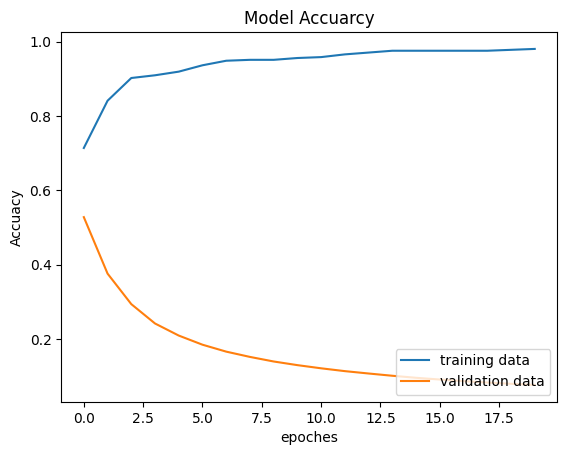

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title("Model Accuarcy")
plt.ylabel("Accuacy")
plt.xlabel("epoches")

plt.legend(['training data' , 'validation data'], loc = 'lower right')

Accuracy of the model on test data

In [17]:
loss, accuarcy = model.evaluate(X_test , y_test)
print(accuarcy)

4/4 [==============================] - 0s 1ms/step - loss: 0.0986 - accuracy: 0.9649
0.9649122953414917


Build a Predictive System for Neural Network

In [18]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 876us/step


In [19]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.03807734 0.70793676]


Since, model is not giving any label data but the prediction Probabilty. 

In [20]:
y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1]


Building Predictive System

In [39]:
# input_data = dataFrame.iloc[0,:-1].values
input_data = (12.86,18.0,83.19,506.3,0.09934,0.09546,0.03889,0.02315,0.1718,0.05997,0.2655,1.095,1.778,20.35,0.005293,0.01661,0.02071,0.008179,0.01748,0.002848,14.24,24.82,91.88,622.1,0.1289,0.2141,0.1731,0.07926,0.2779,0.07918)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

scaler_data = scaler.transform(input_data_reshaped)

prediction = model.predict(scaler_data) 

prediction_label = np.argmax(prediction) if len(prediction.shape) > 1 else int(prediction[0])

if (prediction_label == 0):
    print("The tumor is Malignant")
else:
    print("The tumor is Benign")

1/1 [==============================] - 0s 46ms/step
The tumor is Benign


/Users/pavansaipendry/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
csv_filename = 'breast_cancer_dataset.csv'
dataFrame.to_csv(csv_filename, index=False)

print(f"Dataset successfully saved as {csv_filename}")

Dataset successfully saved as breast_cancer_dataset.csv
